In [6]:
import Naive as nv
import KnuthMorrisPratt as kmp
from bm_preproc import BoyerMoore
#import bm_preproc as bm
import datetime
import time
import random
import string
import statistics as st

In [2]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

#chr1.GRCh38.excerpt
#p = "GGCGCGGTGGCTCACGCCTGTAAT"

In [4]:
# Homo sapiens chromosome 11_GRCh38_Primary Assembly
#Homo sapiens chromosome 11_GRCh38_Primary AssemblyHBB_Homo sapiens chromosome 11_Primary Assembly.fasta'

t = readGenome('Homo sapiens chromosome 11_GRCh38_Primary Assembly.fasta') 
print(t[:5])
len(t)

GATAA


67138

In [5]:
def boyer_moore(p, p_bm, t):
 
    i = 0
    occurrences = []
    while i < len(t) - len(p) + 1:
        shift = 1
        mismatched = False
        for j in range(len(p)-1, -1, -1):
            if p[j] != t[i+j]:
                skip_bc = p_bm.bad_character_rule(j, t[i+j])
                skip_gs = p_bm.good_suffix_rule(j)
                shift = max(shift, skip_bc, skip_gs)
                mismatched = True
                break
        if not mismatched:
            occurrences.append(i)
            skip_gs = p_bm.match_skip()
            shift = max(shift, skip_gs)
        i += shift
    return occurrences

In [8]:
# T: CGTGCCTAC...
p = 'CTTACTTAC'
p_bm = BoyerMoore(p)
skip = p_bm.good_suffix_rule(1) # at 1 position mismatch (left-rigth) 
print(skip)

4


In [11]:
# T: GCTTCTGC....
p = 'CCTTTTGC'
p_bm = BoyerMoore(p)
skip = p_bm.bad_character_rule(4, 'C') # at 4 position mismatch (left-rigth) 
print(skip)

3


In [128]:
# Generating a synthetic dataset
nucleotides=['a','c','g','t']
def generate_random_string(length):
    return ''.join(random.choices(nucleotides, k=length))#string.ascii_lowercase
text = generate_random_string(10000) 
pattern = generate_random_string(8)
#text

In [94]:
#p = pattern
#t = text

#p = 'aaaaaa'
#t = 'abaaaaaaaabcababaaaaaaacabaaaaaaaababc'

In [129]:
start_time = time.time()
positions = kmp.KMP_search(t, p)
end_time = time.time()
times = (end_time - start_time)
print('I found {} in {} seconds'.format(len(positions), times))
print(positions)

I found 5 in 0.27753305435180664 seconds
[56922, 262042, 364263, 657496, 717706]


In [130]:
start_time = time.time()
pos = nv.bruteForce(p, t)
end_time = time.time()
times = (end_time - start_time)
print('I found {} in {} seconds'.format(len(pos), times))
print(pos)

I found 5 in 0.3450748920440674 seconds
[56922, 262042, 364263, 657496, 717706]


In [132]:
lowercase_alphabet = 'ACGT'
p_bm = BoyerMoore(p, lowercase_alphabet)


start_time = time.time()

positions = boyer_moore(p,p_bm,t)
end_time = time.time()
times = (end_time - start_time)
print('I found {} in {} seconds'.format(len(positions), times))
print(positions)

I found 5 in 0.3151540756225586 seconds
[56922, 262042, 364263, 657496, 717706]


In [120]:
#t= ggcagagctc
p= 'gtcaaa'
#p = 'tcgc'
lowercase_alphabet ='acgt'
p_bm = BoyerMoore(p, lowercase_alphabet)

lps = kmp.compute_LPS(p)
print(p_bm.bad_character_rule(4,'g'))
#z = bm.z_array(p)

#print(z)
#print(lps)
#print(p_bm.big_l)
#print(p_bm.small_l_prime)



4


###1. Import a large text: all human chromosome 11

In [25]:
import random
import time
import Naive as nv

In [20]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

genome = readGenome('Homo sapiens chromosome 11_GRCh38_Primary Assembly.fasta') 
len(genome)

67138

In [21]:
genomeRNA =readGenome('rna.fna') 
len(genomeRNA)

KeyboardInterrupt: 

###2. Generate from this text pattern of variable length


In [53]:

def generateReads(genome, numReads, readLen):
    ''' Generating reads from random position in a given genome'''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)- readLen) - 1
        reads.append(genome[start: start + readLen])
    return reads
#generate 100 pattern of length 100
patterns_len_10 = generateReads(genome, 50,10)
patterns_len_25 = generateReads(genome, 50,25)
patterns_len_50 = generateReads(genome, 50,50)
patterns_len_80 = generateReads(genome, 50,80)
patterns_len_100 = generateReads(genome, 50,100)
patterns_len_250 = generateReads(genome, 50,250)
patterns_len_500 = generateReads(genome, 50,500)
patterns_len_750 = generateReads(genome, 50,750)
patterns_len_1000 = generateReads(genome, 50,1000)
patterns_len_1250 = generateReads(genome, 50,1250)
patterns_len_1500 = generateReads(genome, 50,1500)
patterns_len_1750 = generateReads(genome, 50,1750)
patterns_len_2000 = generateReads(genome, 50,2000)
len(patterns_len_25)
print('The length of my genome is {}'.format(len(genome)))


The length of my genome is 67138


In [54]:
lengthPattern = [10,25,50,80,100,250,500,750,1000,1250,1500,1750,2000]
for l in lengthPattern:
    print('patterns_len_{}'.format(l))
print(len(lengthPattern))

patterns_len_10
patterns_len_25
patterns_len_50
patterns_len_80
patterns_len_100
patterns_len_250
patterns_len_500
patterns_len_750
patterns_len_1000
patterns_len_1250
patterns_len_1500
patterns_len_1750
patterns_len_2000
13


## Analysis performance
##### 3.1 Naive test

In [55]:
times_nv_10 =[]
for p in patterns_len_10:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_10.append(times)

times_nv_25 =[]
for p in patterns_len_25:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_25.append(times)

times_nv_50 =[]
for p in patterns_len_50:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_50.append(times)

times_nv_80 =[]
for p in patterns_len_80:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_80.append(times)

times_nv_100 =[]
for p in patterns_len_100:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_100.append(times)

times_nv_250 =[]
for p in patterns_len_250:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_250.append(times)

times_nv_500 =[]
for p in patterns_len_500:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_500.append(times)

times_nv_750 =[]
for p in patterns_len_750:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_750.append(times)

times_nv_1000 =[]
for p in patterns_len_1000:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_1000.append(times)

times_nv_1250 =[]
for p in patterns_len_1250:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_1250.append(times)

times_nv_1500 =[]
for p in patterns_len_1500:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_1500.append(times)

times_nv_1750 =[]
for p in patterns_len_1750:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_1750.append(times)

times_nv_2000 =[]
for p in patterns_len_2000:
   start_time = time.time()
   pos = nv.bruteForce(p, genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_nv_2000.append(times)

## Simulating Knuth Morris Pratt

In [56]:
import KnuthMorrisPratt as kmp

times_kmp_10 =[]
for p in patterns_len_10:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_10.append(times)

times_kmp_25 =[]
for p in patterns_len_25:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_25.append(times)

times_kmp_50 =[]
for p in patterns_len_50:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_50.append(times)

times_kmp_80 =[]
for p in patterns_len_80:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_80.append(times)

times_kmp_100 =[]
for p in patterns_len_100:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_100.append(times)

times_kmp_250 =[]
for p in patterns_len_250:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_250.append(times)

times_kmp_500 =[]
for p in patterns_len_500:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_500.append(times)

times_kmp_750 =[]
for p in patterns_len_750:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_750.append(times)

times_kmp_1000 =[]
for p in patterns_len_1000:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_1000.append(times)

times_kmp_1250 =[]
for p in patterns_len_1250:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_1250.append(times)

times_kmp_1500 =[]
for p in patterns_len_1500:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_1500.append(times)

times_kmp_1750 =[]
for p in patterns_len_1750:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_1750.append(times)

times_kmp_2000 =[]
for p in patterns_len_2000:
   start_time = time.time()
   positions = kmp.KMP_search(genome, p)
   end_time = time.time()
   times = (end_time - start_time)
   times_kmp_2000.append(times)

## Simulating Boyer Moore

In [57]:
lowercase_alphabet = 'ACGT'

times_bm_10 =[]
for p in patterns_len_10:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_10.append(times)

times_bm_25 =[]
for p in patterns_len_25:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_25.append(times)

times_bm_50 =[]
for p in patterns_len_50:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_50.append(times)

times_bm_80 =[]
for p in patterns_len_80:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_80.append(times)

times_bm_100 =[]
for p in patterns_len_100:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_100.append(times)

times_bm_250 =[]
for p in patterns_len_250:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_250.append(times)

times_bm_500 =[]
for p in patterns_len_500:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_500.append(times)

times_bm_750 =[]
for p in patterns_len_750:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_750.append(times)

times_bm_1000 =[]
for p in patterns_len_1000:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_1000.append(times)

times_bm_1250 =[]
for p in patterns_len_1250:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_1250.append(times)

times_bm_1500 =[]
for p in patterns_len_1500:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_1500.append(times)


times_bm_1750 =[]
for p in patterns_len_1750:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_1750.append(times)

times_bm_2000 =[]
for p in patterns_len_2000:
   start_time = time.time()
   p_bm = BoyerMoore(p, lowercase_alphabet)
   positions = boyer_moore(p,p_bm,genome)
   end_time = time.time()
   times = (end_time - start_time)
   times_bm_2000.append(times)

In [87]:
print(round(sum(times_nv_500)/20, 3))

0.08


In [61]:
tx = open('performancePatternMatching_median.csv', 'w+')#w+
tx.seek(0)

0

In [59]:

tx.write('Pattern Length (char),Running time (sec),Algo Type'+'\n')
tx.write('10,'+ str(round(sum(times_nv_10)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('25,'+ str(round(sum(times_nv_25)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('50,'+ str(round(sum(times_nv_50)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('80,'+ str(round(sum(times_nv_80)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('100,'+ str(round(sum(times_nv_100)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('250,'+ str(round(sum(times_nv_250)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('500,'+ str(round(sum(times_nv_500)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('750,'+ str(round(sum(times_nv_750)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('1000,'+ str(round(sum(times_nv_1000)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('1250,'+ str(round(sum(times_nv_1250)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('1500,'+ str(round(sum(times_nv_1500)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('1750,'+ str(round(sum(times_nv_1750)/len(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('2000,'+ str(round(sum(times_nv_2000)/len(times_nv_10), 3)) + ',Naive'+'\n')

tx.write('10,'+ str(round(sum(times_kmp_10)/len(times_kmp_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('25,'+ str(round(sum(times_kmp_25)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('50,'+ str(round(sum(times_kmp_50)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('80,'+ str(round(sum(times_kmp_80)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('100,'+ str(round(sum(times_kmp_100)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('250,'+ str(round(sum(times_kmp_250)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('500,'+ str(round(sum(times_kmp_500)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('750,'+ str(round(sum(times_kmp_750)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1000,'+ str(round(sum(times_kmp_1000)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1250,'+ str(round(sum(times_kmp_1250)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1500,'+ str(round(sum(times_kmp_1500)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1750,'+ str(round(sum(times_kmp_1750)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('2000,'+ str(round(sum(times_kmp_2000)/len(times_nv_10), 3)) + ',Knuth-Morris-Pratt'+'\n')

tx.write('10,'+ str(round(sum(times_bm_10)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('25,'+ str(round(sum(times_bm_25)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('50,'+ str(round(sum(times_bm_50)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('80,'+ str(round(sum(times_bm_80)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('100,'+ str(round(sum(times_bm_100)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('250,'+ str(round(sum(times_bm_250)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('500,'+ str(round(sum(times_bm_500)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('750,'+ str(round(sum(times_bm_750)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('1000,'+ str(round(sum(times_bm_1000)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('1250,'+ str(round(sum(times_bm_1250)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('1500,'+ str(round(sum(times_bm_1500)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('1750,'+ str(round(sum(times_bm_1750)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('2000,'+ str(round(sum(times_bm_2000)/len(times_nv_10), 3)) + ',Boyer-Moore'+'\n')


23

In [62]:

tx.write('Pattern Length (char),Running time (sec),Algo Type'+'\n')
tx.write('10,'+ str(round(st.median(times_nv_10), 3)) + ',Naive'+'\n')
tx.write('25,'+ str(round(st.median(times_nv_25), 3)) + ',Naive'+'\n')
tx.write('50,'+ str(round(st.median(times_nv_50), 3)) + ',Naive'+'\n')
tx.write('80,'+ str(round(st.median(times_nv_80), 3)) + ',Naive'+'\n')
tx.write('100,'+ str(round(st.median(times_nv_100), 3)) + ',Naive'+'\n')
tx.write('250,'+ str(round(st.median(times_nv_250), 3)) + ',Naive'+'\n')
tx.write('500,'+ str(round(st.median(times_nv_500), 3)) + ',Naive'+'\n')
tx.write('750,'+ str(round(st.median(times_nv_750), 3)) + ',Naive'+'\n')
tx.write('1000,'+ str(round(st.median(times_nv_1000), 3)) + ',Naive'+'\n')
tx.write('1250,'+ str(round(st.median(times_nv_1250), 3)) + ',Naive'+'\n')
tx.write('1500,'+ str(round(st.median(times_nv_1500), 3)) + ',Naive'+'\n')
tx.write('1750,'+ str(round(st.median(times_nv_1750), 3)) + ',Naive'+'\n')
tx.write('2000,'+ str(round(st.median(times_nv_2000), 3)) + ',Naive'+'\n')

tx.write('10,'+ str(round(st.median(times_kmp_10), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('25,'+ str(round(st.median(times_kmp_25), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('50,'+ str(round(st.median(times_kmp_50), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('80,'+ str(round(st.median(times_kmp_80), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('100,'+ str(round(st.median(times_kmp_100), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('250,'+ str(round(st.median(times_kmp_250), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('500,'+ str(round(st.median(times_kmp_500), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('750,'+ str(round(st.median(times_kmp_750), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1000,'+ str(round(st.median(times_kmp_1000), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1250,'+ str(round(st.median(times_kmp_1250), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1500,'+ str(round(st.median(times_kmp_1500), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('1750,'+ str(round(st.median(times_kmp_1750), 3)) + ',Knuth-Morris-Pratt'+'\n')
tx.write('2000,'+ str(round(st.median(times_kmp_2000), 3)) + ',Knuth-Morris-Pratt'+'\n')

tx.write('10,'+ str(round(st.median(times_bm_10), 3)) + ',Boyer-Moore'+'\n')
tx.write('25,'+ str(round(st.median(times_bm_25), 3)) + ',Boyer-Moore'+'\n')
tx.write('50,'+ str(round(st.median(times_bm_50), 3)) + ',Boyer-Moore'+'\n')
tx.write('80,'+ str(round(st.median(times_bm_80), 3)) + ',Boyer-Moore'+'\n')
tx.write('100,'+ str(round(st.median(times_bm_100), 3)) + ',Boyer-Moore'+'\n')
tx.write('250,'+ str(round(st.median(times_bm_250), 3)) + ',Boyer-Moore'+'\n')
tx.write('500,'+ str(round(st.median(times_bm_500), 3)) + ',Boyer-Moore'+'\n')
tx.write('750,'+ str(round(st.median(times_bm_750), 3)) + ',Boyer-Moore'+'\n')
tx.write('1000,'+ str(round(st.median(times_bm_1000), 3)) + ',Boyer-Moore'+'\n')
tx.write('1250,'+ str(round(st.median(times_bm_1250), 3)) + ',Boyer-Moore'+'\n')
tx.write('1500,'+ str(round(st.median(times_bm_1500), 3)) + ',Boyer-Moore'+'\n')
tx.write('1750,'+ str(round(st.median(times_bm_1750), 3)) + ',Boyer-Moore'+'\n')
tx.write('2000,'+ str(round(st.median(times_bm_2000), 3)) + ',Boyer-Moore'+'\n')


23

In [63]:
tx.close()

In [46]:
tx = open('performance_allValues.csv', 'w+')#w+
tx.seek(0)

0

In [47]:
tx.close()

In [175]:
tx.seek(0)
tx.write('Pattern Length (char),Running time (sec),Algo Type'+'\n')
for el in times_nv_10:
    tx.write('10,'+ str(el) + ',Naive'+'\n')
for el in times_nv_25:
    tx.write('25,'+ str(el) + ',Naive'+'\n')
for el in times_nv_50:
    tx.write('50,'+ str(el) + ',Naive'+'\n')
for el in times_nv_80:
    tx.write('80,'+ str(el) + ',Naive'+'\n')
for el in times_nv_100:
    tx.write('100,'+ str(el) + ',Naive'+'\n')
for el in times_nv_250:
    tx.write('250,'+ str(el) + ',Naive'+'\n')
for el in times_nv_500:
    tx.write('500,'+ str(el) + ',Naive'+'\n')
for el in times_nv_750:
    tx.write('750,'+ str(el) + ',Naive'+'\n')
for el in times_nv_1000:
    tx.write('1000,'+ str(el) + ',Naive'+'\n')
for el in times_nv_1250:
    tx.write('1250,'+ str(el) + ',Naive'+'\n')
for el in times_nv_1500:
    tx.write('1500,'+ str(el) + ',Naive'+'\n')
for el in times_nv_1750:
    tx.write('1750,'+ str(el) + ',Naive'+'\n')
for el in times_nv_2000:
    tx.write('2000,'+ str(el) + ',Naive'+'\n')

#KMP
for el in times_kmp_10:
    tx.write('10,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_25:
    tx.write('25,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_50:
    tx.write('50,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_80:
    tx.write('80,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_100:
    tx.write('100,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_250:
    tx.write('250,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_500:
    tx.write('500,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_750:
    tx.write('750,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_1000:
    tx.write('1000,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_1250:
    tx.write('1250,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_1500:
    tx.write('1500,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_1750:
    tx.write('1750,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')
for el in times_kmp_2000:
    tx.write('2000,'+ str(el) + ',Knuth-Morris-Pratt'+'\n')

#BM

for el in times_bm_10:
    tx.write('10,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_25:
    tx.write('25,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_50:
    tx.write('50,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_100:
    tx.write('100,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_250:
    tx.write('250,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_250:
    tx.write('250,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_500:
    tx.write('500,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_750:
    tx.write('750,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_1000:
    tx.write('1000,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_1250:
    tx.write('1250,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_1500:
    tx.write('1500,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_1750:
    tx.write('1750,'+ str(el) + ',Boyer-Moore'+'\n')
for el in times_bm_2000:
    tx.write('2000,'+ str(el) + ',Boyer-Moore'+'\n')

tx.close()

# Scatterplot performance

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [65]:
df = pd.read_csv("performancePatternMatching_median.csv")
#df = pd.read_csv("performance_allValues.csv")
df

,Pattern Length (char),Running time (sec),Algo Type
0,10,0.032,Naive
1,25,0.040,Naive
2,50,0.040,Naive
3,80,0.027,Naive
4,100,0.026,Naive
5,250,0.027,Naive
6,500,0.032,Naive
7,750,0.030,Naive
8,1000,0.029,Naive
9,1250,0.030,Naive


In [66]:
dict_labels = {
    'Naive': 0,
    'Boyer-Moore': 1,
    'Knuth-Morris-Pratt': 2
}
df["label"] = df["Algo Type"].apply(lambda x: dict_labels[x])
df.head()

,Pattern Length (char),Running time (sec),Algo Type,label
0,10,0.032,Naive,0
1,25,0.040,Naive,0
2,50,0.040,Naive,0
3,80,0.027,Naive,0
4,100,0.026,Naive,0


In [67]:
KMP_ist = df.loc[df['label']== 2]
BM_ist = df.loc[df['label']== 1]
NAIVE_ist = df.loc[df['label']== 0]
KMP_ist

,Pattern Length (char),Running time (sec),Algo Type,label
13,10,0.022,Knuth-Morris-Pratt,2
14,25,0.026,Knuth-Morris-Pratt,2
15,50,0.030,Knuth-Morris-Pratt,2
16,80,0.028,Knuth-Morris-Pratt,2
17,100,0.026,Knuth-Morris-Pratt,2
18,250,0.026,Knuth-Morris-Pratt,2
19,500,0.017,Knuth-Morris-Pratt,2
20,750,0.018,Knuth-Morris-Pratt,2
21,1000,0.021,Knuth-Morris-Pratt,2
22,1250,0.018,Knuth-Morris-Pratt,2


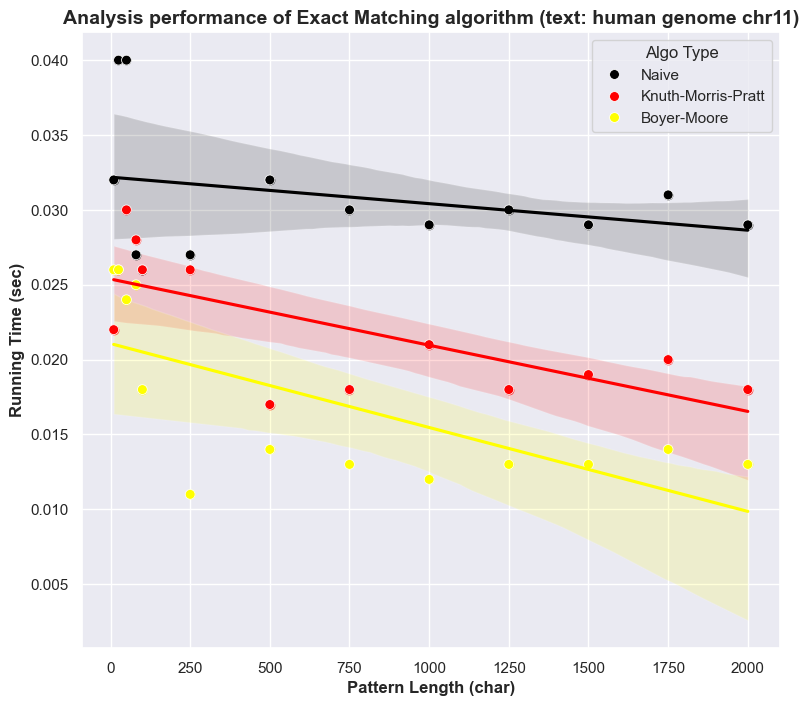

In [68]:
plt.figure(figsize= (9,8))
sns.regplot (x='Pattern Length (char)', 
             y="Running time (sec)",
             color ='red',
             data =KMP_ist)

sns.regplot (x='Pattern Length (char)', 
             y="Running time (sec)",
             color ='yellow',
             data =BM_ist)
sns.regplot (x='Pattern Length (char)', 
             y="Running time (sec)",
             color ='black',
             data =NAIVE_ist)

sns.scatterplot(data=df, 
                x='Pattern Length (char)', 
                y="Running time (sec)", 
                hue="Algo Type",
                palette = ['black', 'red', 'yellow'],
                #palette = sns.color_palette("Spectral", n_colors=3, as_cmap=False),#['black', 'red', 'yellow']
                s = 50)
                #palette = sns.color_palette("Spectral", n_colors=3, as_cmap=False),#['black', 'red', 'yellow'],

#plt.legend(*scatter.legend_elements(), loc = "upper left", title = 'String Matching Algorithms')

#title of the scatter
plt.title('Analysis performance of Exact Matching algorithm (text: human genome chr11)',
          fontsize = 14,
          weight = 'bold')

#label on x-axis and y-axis
plt.xlabel('Pattern Length (char)', weight ='bold')
plt.ylabel("Running Time (sec)", weight = 'bold')

plt.show()
